In [43]:
import pandas as pd
import numpy as np
import glob
import sys

Cus_Info=pd.DataFrame()

for f in glob.glob("C:\\Users\\82109\\Desktop\\산공종설\\연습\\2*.xlsx"):
    data = pd.read_excel(f)

    columns = ['결제일자','품목코드','수취인','수취인연락처1']
    df = pd.DataFrame(data, columns=columns)
    Cus_Info = Cus_Info.append(df, ignore_index=True)

print(Cus_Info.shape)
    
Cus_Info.head()

(68591, 4)


,결제일자,품목코드,수취인,수취인연락처1
0,2020-10-05 00:00:00,A0001,안정은,0507-1884-0678
1,2020-10-05 00:00:00,A0001,박종훈,0507-1883-8032
2,2020-10-05 00:00:00,A0001,황예준,010-5098-2073
3,2020-10-05 00:00:00,A0001,정하연,010-8332-1124
4,2020-10-05 00:00:00,A0001,김언희,010-8984-0123


In [44]:
Cus_Info.to_excel("C:\\Users\\82109\\Desktop\\산공종설\\연습\\Cus_data.xlsx", header=True, index=False)

In [51]:
Cus = pd.read_table("C:\\Users\\82109\\Desktop\\산공종설\\연습\\Cus_Data.txt",sep=',',encoding='cp949')
Cus.head()

,결제일자,품목코드,수취인,수취인연락처1
0,2020-10-5 0:00:00,A0001,안정은,0507-1884-0678
1,2020-10-5 0:00:00,A0001,박종훈,0507-1883-8032
2,2020-10-5 0:00:00,A0001,황예준,010-5098-2073
3,2020-10-5 0:00:00,A0001,정하연,010-8332-1124
4,2020-10-5 0:00:00,A0001,김언희,010-8984-0123


In [53]:
Cus.rename(columns={Cus.columns[3]:'연락처'},inplace=True)
Cus.head()

,결제일자,품목코드,수취인,연락처
0,2020-10-5 0:00:00,A0001,안정은,0507-1884-0678
1,2020-10-5 0:00:00,A0001,박종훈,0507-1883-8032
2,2020-10-5 0:00:00,A0001,황예준,010-5098-2073
3,2020-10-5 0:00:00,A0001,정하연,010-8332-1124
4,2020-10-5 0:00:00,A0001,김언희,010-8984-0123


In [70]:
Cus.sort_values(by='품목코드', ascending=True).head()

,결제일자,품목코드,수취인,연락처
0,2020-10-5 0:00:00,A0001,안정은,0507-1884-0678
17145,2020-5-18 0:00:00,A0001,최선빈,010-2393-0513
17143,2020-5-18 0:00:00,A0001,이혜우,010-9049-1484
33204,2021-2-17 0:00:00,A0001,성현지,010-6427-0553
17141,2020-5-18 0:00:00,A0001,박지원,010-4942-5641


In [74]:
pd.to_datetime(Cus['결제일자'])

0       2020-10-05
1       2020-10-05
2       2020-10-05
3       2020-10-05
4       2020-10-05
           ...    
48785   2021-08-10
48786   2021-08-10
48787   2021-08-10
48788   2021-08-10
48789   2021-08-10
Name: 결제일자, Length: 48790, dtype: datetime64[ns]

In [75]:
print(len(Cus['수취인'].unique()))

19163


In [76]:
Cus1= Cus.groupby('수취인')['결제일자'].nunique()
Cus1.describe()
#수취인 한명당 unique 한 결제일자

count    19163.000000
mean         2.064865
std          3.352996
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        108.000000
Name: 결제일자, dtype: float64

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

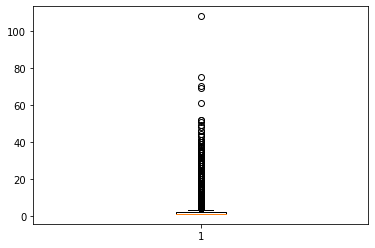

In [78]:
plt.boxplot(Cus1)
plt.show()

In [79]:
Cus2= Cus.groupby('수취인')['품목코드'].nunique()
Cus2.describe()
#수취인 한명당 unique 한 품목

count    19163.000000
mean         1.619579
std          0.902823
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: 품목코드, dtype: float64

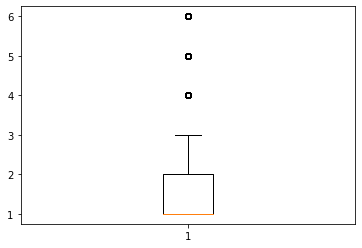

In [80]:
plt.boxplot(Cus2)
plt.show()